In [5]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
# Function to load images and labels from the dataset
def load_data(dataset_path):
    images = []
    labels = []
    image_size = (64, 64)  # Define the image size to which each image will be resized

    # Iterate over each gesture folder in the dataset
    for gesture in os.listdir(dataset_path):
        gesture_path = os.path.join(dataset_path, gesture)
        
        # Skip if it's not a directory
        if not os.path.isdir(gesture_path):
            continue
        
        # Load each image in the gesture folder
        for img_name in os.listdir(gesture_path):
            img_path = os.path.join(gesture_path, img_name)
            img = cv2.imread(img_path)
            
            # Check if the image was loaded successfully
            if img is None:
                print(f"Warning: Unable to read image {img_path}. It may not exist or is corrupted.")
                continue
            
            # Resize image and append it to the list
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(int(gesture))  # Assuming folders are named 0, 1, 2, ..., num_classes-1
    
    print(f"Total images loaded: {len(images)}")
    print(f"Total labels loaded: {len(labels)}")
    return np.array(images), np.array(labels)

# Set path to your dataset directory
dataset_path = r'C:\Users\Rishav Roshan\Downloads\leapGestRecog'

# Load images and labels
images, labels = load_data(dataset_path)

# Check if images and labels are loaded
if images.size == 0 or labels.size == 0:
    raise ValueError("No images or labels loaded. Please check your dataset.")

# Preprocess the images and labels
images = images.astype('float32') / 255.0  # Normalize pixel values
num_classes = len(set(labels))  # Update this based on your dataset's classes
labels = np.eye(num_classes)[labels]  # One-hot encoding

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


Total images loaded: 20000
Total labels loaded: 20000


In [ ]:
# CNN Model for Hand Gesture Recognition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


c:\Users\Rishav Roshan\OneDrive\Desktop\ML_Project\Task_3\tutorial-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=30,
    callbacks=[early_stopping]
)

c:\Users\Rishav Roshan\OneDrive\Desktop\ML_Project\Task_3\tutorial-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 76s 147ms/step - accuracy: 0.1972 - loss: 2.1539 - val_accuracy: 0.6888 - val_loss: 0.9242
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 87s 174ms/step - accuracy: 0.5836 - loss: 1.1698 - val_accuracy: 0.9093 - val_loss: 0.3434
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 68s 136ms/step - accuracy: 0.7502 - loss: 0.6903 - val_accuracy: 0.9655 - val_loss: 0.1485
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 54s 108ms/step - accuracy: 0.8324 - loss: 0.4573 - val_accuracy: 0.9868 - val_loss: 0.0700
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 95ms/step - accuracy: 0.8678 - loss: 0.3604 - val_accuracy: 0.9820 - val_loss: 0.0617
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 147ms/step - accuracy: 0.8928 - loss: 0.2931 - val_accuracy: 0.9895 - val_loss: 0.0397
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 64s 128ms/step - accuracy: 0.9083 - loss: 0.2418 - val_accuracy: 0.9885 - val_loss: 0.0299
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 121ms/step - accuracy: 0.9217 - loss: 0.

In [ ]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

125/125 - 2s - 15ms/step - accuracy: 0.9895 - loss: 0.0143
Test accuracy: 98.95%


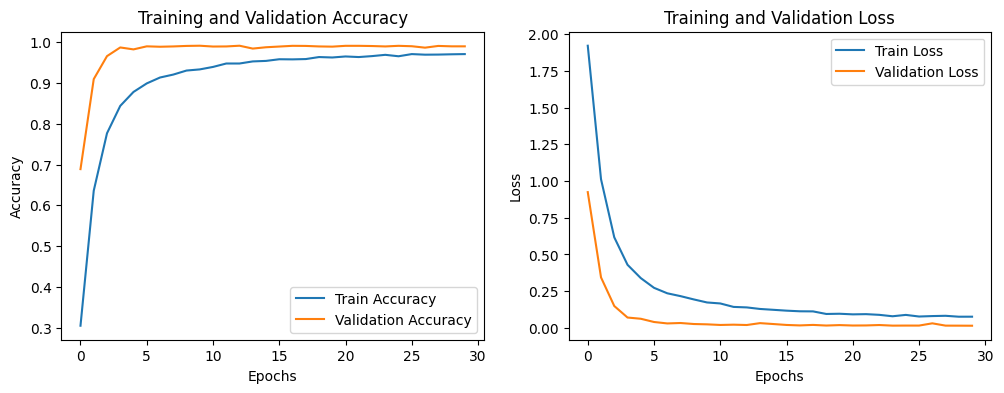

In [ ]:
# Ploting training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Saving the trained model
model.save("hand_gesture_recognition_model.h5")
print("Model saved as 'hand_gesture_recognition_model.h5'")

Model saved as 'hand_gesture_recognition_model.h5'
